In [243]:
import matplotlib.pyplot as plt
import numpy as np

#All from perspective of server IE upload is actually server send(client Recieve), download is server receive(client send)

verizonUpload = []
tmobileUpload = []
ethernetUpload = []

verizonDownload = []
tmobileDownload = []
ethernetDownload = []

verizonLatency = []
tmobileLatency = []
ethernetLatency = []

with open('./verizon-lte/upload.txt', 'r') as f:
    for line in f:
        verizonUpload.append(float(line))
f.close()

with open('./verizon-lte/download.txt', 'r') as f:
    for line in f:
        verizonDownload.append(float(line))
f.close()

with open('./verizon-lte/latency.txt', 'r') as f:
    for line in f:
        verizonLatency.append(float(line))
f.close()

with open('./tmobile-lte/upload.txt', 'r') as f:
    for line in f:
        tmobileUpload.append(float(line))
f.close()

with open('./tmobile-lte/download.txt', 'r') as f:
    for line in f:
        tmobileDownload.append(float(line))
f.close()

with open('./tmobile-lte/latency.txt', 'r') as f:
    for line in f:
        tmobileLatency.append(float(line))
f.close()

with open('./ethernet/upload.txt', 'r') as f:
    for line in f:
        ethernetUpload.append(float(line))
f.close()

with open('./ethernet/download.txt', 'r') as f:
    for line in f:
        ethernetDownload.append(float(line))
f.close()

with open('./ethernet/latency.txt', 'r') as f:
    for line in f:
        ethernetLatency.append(float(line))
f.close()

In [244]:
# verizonUploadRunningAvg = truncateData(verizonUpload)
# tmobileUploadRunningAvg = truncateData(tmobileUpload)
# ethernetUploadRunningAvg = truncateData(ethernetUpload)
def plotInHist(v, t, e, xlab, ylab, title):
    kwargs = dict(histtype='step', stacked=True,
              alpha=0.3)

    plt.hist(v, **kwargs, color='blue', label='Verizon')
    plt.hist(t, **kwargs, color='red', label='T-Mobile')
    plt.hist(e, **kwargs, color='orange', label='Ethernet');
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()

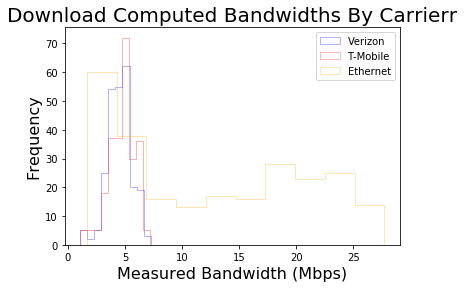

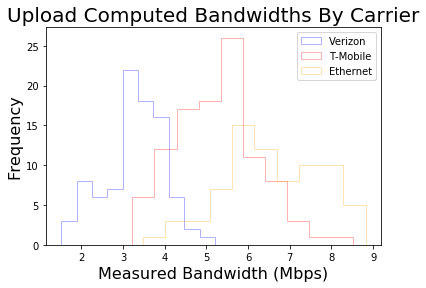

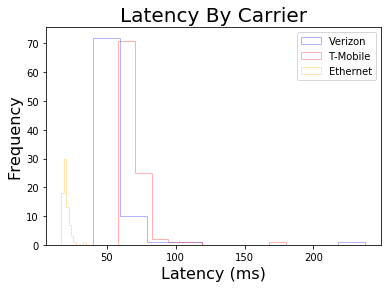

In [245]:
def truncateData(start, end, data):
    return data[start:end]

vUploadTrunc = truncateData(50, 300, verizonUpload)
tUploadTrunc = truncateData(50, 300, tmobileUpload)
eUploadTrunc = truncateData(50, 300, ethernetUpload)

vDownloadTrunc = truncateData(50, 300, verizonDownload)
tDownloadTrunc = truncateData(50, 300, tmobileDownload)
eDownloadTrunc = truncateData(50, 300, ethernetDownload)

vLatTrunc = truncateData(50, 300, verizonLatency)
tLatTrunc = truncateData(50, 300, tmobileLatency)
eLatTrunc = truncateData(50, 300, ethernetLatency)


plotInHist(vUploadTrunc, tUploadTrunc, eUploadTrunc, 'Measured Bandwidth (Mbps)', 'Frequency', 'Download Computed Bandwidths By Carrierr')
plotInHist(vDownloadTrunc, tDownloadTrunc, eDownloadTrunc, 'Measured Bandwidth (Mbps)', 'Frequency', 'Upload Computed Bandwidths By Carrier')
plotInHist(vLatTrunc, tLatTrunc, eLatTrunc, 'Latency (ms)', 'Frequency', 'Latency By Carrier')


In [302]:
#Grace Period Graphing for tmobile lte

points = 23

grace_1_upload = np.zeros((points, 3))
grace_1_download = np.zeros((points, 3))
grace_1_latency = np.zeros((points, 3))
grace_10_upload = np.zeros((points, 3))
grace_10_download = np.zeros((points, 3))
grace_10_latency = np.zeros((points, 3))
grace_50_upload = np.zeros((points, 3))
grace_50_download = np.zeros((points, 3))
grace_50_latency = np.zeros((points, 3))

with open('./tmobile-lte/grace-period-1/measurement1/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_upload[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement1/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_download[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement1/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_latency[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement2/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_upload[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement2/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_download[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement2/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_latency[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement3/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_upload[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement3/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_download[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement3/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_latency[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement1/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_upload[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement1/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_download[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement1/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_latency[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement2/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_upload[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement2/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_download[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement2/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_latency[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement3/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_upload[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement3/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_download[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement3/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_latency[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement1/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_upload[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement1/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_download[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement1/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_latency[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement2/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_upload[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement2/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_download[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement2/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_latency[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement3/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_upload[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement3/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_download[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement3/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_latency[count][2] = float(line)
        count += 1
f.close()

In [303]:
avg_grace_1_upload = np.mean(grace_1_upload, axis=1)
avg_grace_10_upload = np.mean(grace_10_upload, axis=1)
avg_grace_50_upload = np.mean(grace_50_upload, axis=1)

avg_grace_1_download = np.mean(grace_1_download, axis=1)
avg_grace_10_download = np.mean(grace_10_download, axis=1)
avg_grace_50_download = np.mean(grace_50_download, axis=1)

avg_grace_1_latency = np.mean(grace_1_latency, axis=1)
avg_grace_10_latency = np.mean(grace_10_latency, axis=1)
avg_grace_50_latency = np.mean(grace_50_latency, axis=1)

In [304]:
def plotLines(g1, g10, g50, xlab, ylab, title):

    plt.plot(range(g1.shape[0]), g1,color='blue', label='Grace Period 1')
    plt.plot(range(g10.shape[0]), g10, color='red', label='Grace Period 10')
    plt.plot(range(g50.shape[0]), g50, color='orange', label='Grace Period 50');
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()

In [305]:
def plotLinesExtra(g1, g1_o, g10, g10_o, g50, g50_o, xlab, ylab, title):

    plt.plot(range(g1.shape[0]), g1, color='blue', label='Grace Period 1')
    plt.plot(range(g1_o.shape[0]), g1_o[:, 0], color='blue', alpha=0.2)
    plt.plot(range(g1_o.shape[0]), g1_o[:, 1], color='blue', alpha=0.2)
    plt.plot(range(g1_o.shape[0]), g1_o[:, 2], color='blue', alpha=0.2)
    plt.plot(range(g10.shape[0]), g10, color='red', label='Grace Period 10')
    plt.plot(range(g10_o.shape[0]), g10_o[:, 0], color='red', alpha=0.2)
    plt.plot(range(g10_o.shape[0]), g10_o[:, 1], color='red', alpha=0.2)
    plt.plot(range(g10_o.shape[0]), g10_o[:, 2], color='red', alpha=0.2)
    plt.plot(range(g50.shape[0]), g50, color='orange', label='Grace Period 50')
    plt.plot(range(g50_o.shape[0]), g50_o[:, 0], color='orange', alpha=0.2)
    plt.plot(range(g50_o.shape[0]), g50_o[:, 1], color='orange', alpha=0.2)
    plt.plot(range(g50_o.shape[0]), g50_o[:, 2], color='orange', alpha=0.2)
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()

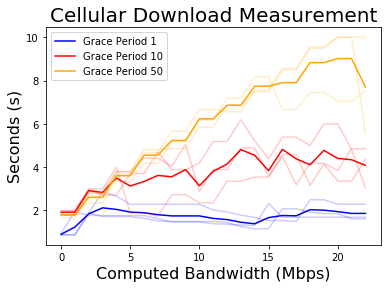

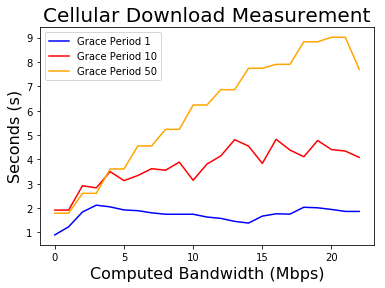

In [306]:
plotLinesExtra(avg_grace_1_upload, grace_1_upload, avg_grace_10_upload, grace_10_upload, avg_grace_50_upload, grace_50_upload, 'Computed Bandwidth (Mbps)', 'Seconds (s)', 'Cellular Download Measurement')
plotLines(avg_grace_1_upload, avg_grace_10_upload, avg_grace_50_upload, 'Computed Bandwidth (Mbps)', 'Seconds (s)', 'Cellular Download Measurement')

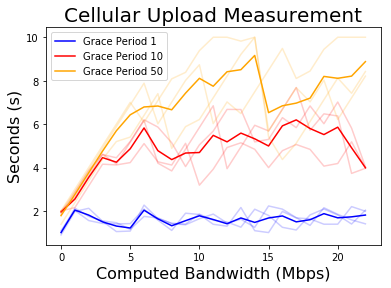

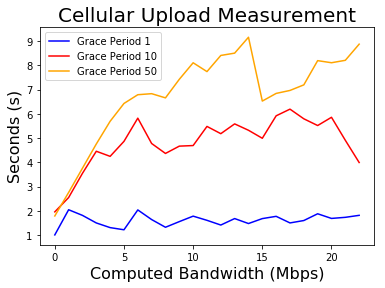

In [307]:
plotLinesExtra(avg_grace_1_download, grace_1_download, avg_grace_10_download, grace_10_download, avg_grace_50_download, grace_50_download, 'Computed Bandwidth (Mbps)', 'Seconds (s)', 'Cellular Upload Measurement')
plotLines(avg_grace_1_download, avg_grace_10_download, avg_grace_50_download, 'Computed Bandwidth (Mbps)', 'Seconds (s)', 'Cellular Upload Measurement')

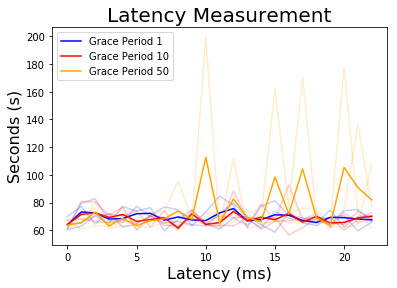

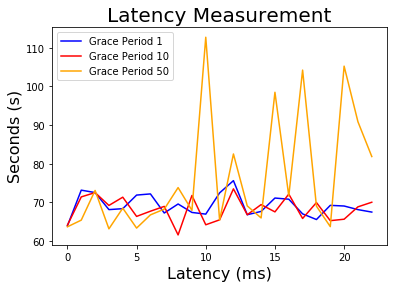

In [308]:
plotLinesExtra(avg_grace_1_latency, grace_1_latency, avg_grace_10_latency, grace_10_latency, avg_grace_50_latency, grace_50_latency, 'Latency (ms)', 'Seconds (s)', 'Latency Measurement')
plotLines(avg_grace_1_latency, avg_grace_10_latency, avg_grace_50_latency, 'Latency (ms)', 'Seconds (s)', 'Latency Measurement')